In [1]:
import pandas as pd
data = pd.read_csv("/kaggle/input/song-data/songs.csv", encoding='latin-1',engine='python')
# Preview the first & last 5 lines of the loaded data
data

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,89,67,8,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,93,75,52,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,84,76,29,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,92,70,8,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,84,64,9,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,66,61,20,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,79,75,7,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,76,53,9,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,79,60,42,1,7,69


In [2]:
data.describe()

,id,year,energy,danceability,liveness,acousticness,speechiness,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,70.504146,64.379768,17.774461,14.326700,8.358209,66.520730
std,174.215384,2.607057,16.310664,13.378718,13.102543,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,61.000000,57.000000,9.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,74.000000,66.000000,12.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,82.000000,73.000000,24.000000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,98.000000,97.000000,74.000000,99.000000,48.000000,99.000000


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'pop'}>, <Axes: >]], dtype=object)

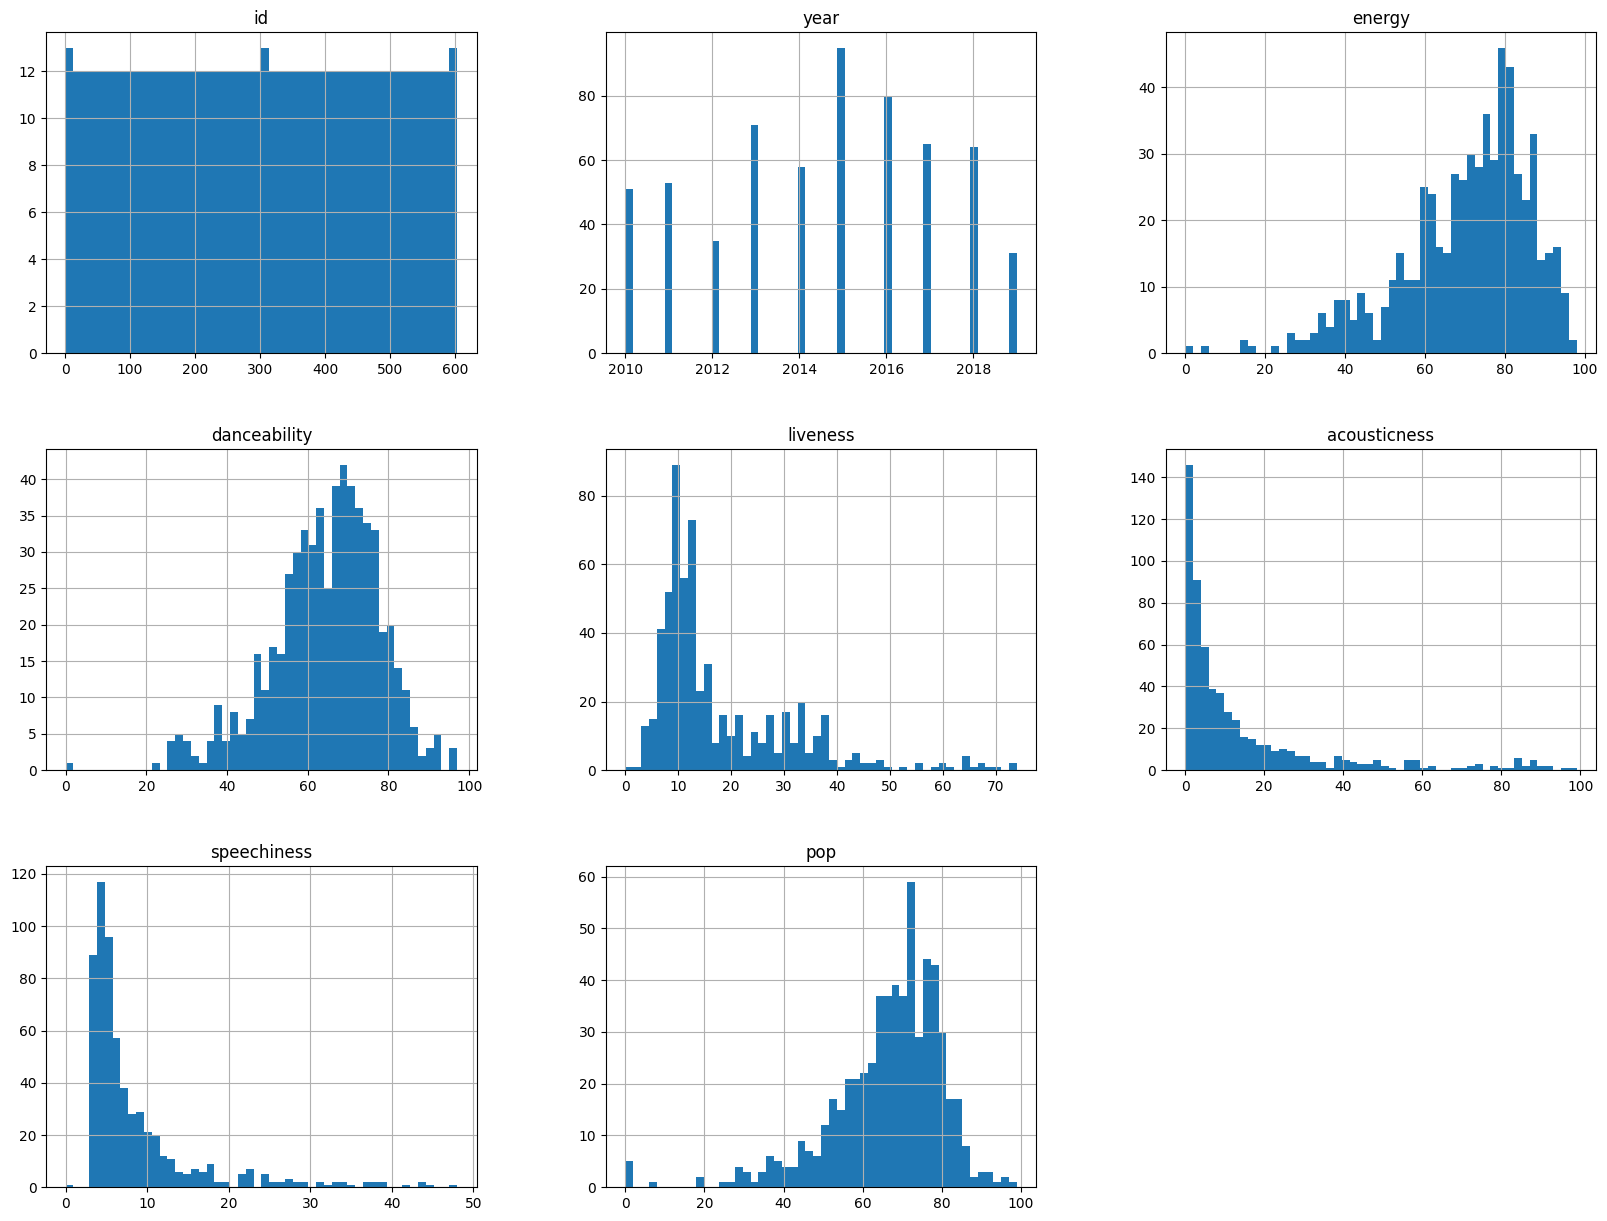

In [3]:
from matplotlib import pyplot as plt
data.hist(bins=50,figsize=(20,15))

In [4]:
# remove song names, artist and id before clustering
data_features = data.copy()
data_features = data_features.drop(['title','artist','id','year','top genre'],axis=1)
data_features

,energy,danceability,liveness,acousticness,speechiness,pop
0,89,67,8,19,4,83
1,93,75,52,24,23,82
2,84,76,29,10,14,80
3,92,70,8,0,4,79
4,84,64,9,2,4,78
...,...,...,...,...,...,...
598,66,61,20,1,3,75
599,79,75,7,21,12,75
600,76,53,9,7,34,70
601,79,60,42,1,7,69


In [5]:
#from sklearn.metrics import silhouette_score
#from sklearn.cluster import KMeans
#for n_clusters in range(2,15):
#    clusterer = KMeans (n_clusters=n_clusters)
#    preds = clusterer.fit_predict(data_features)
#    centers = clusterer.cluster_centers_

#    score = silhouette_score (data_features, preds, metric='euclidean')
#    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

In [6]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, n_init='auto')
    km = km.fit(data_features)
    Sum_of_squared_distances.append(km.inertia_)

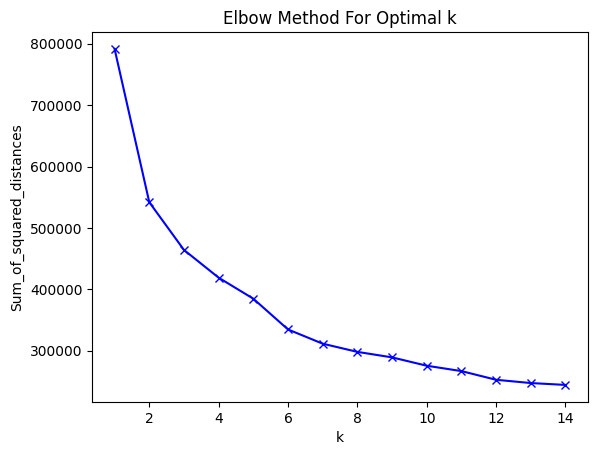

In [7]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [8]:
kmeans = KMeans(n_clusters=6, n_init='auto')
kmeans.fit(data_features)

KMeans(n_clusters=6, n_init='auto')

In [9]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(data_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_features)


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


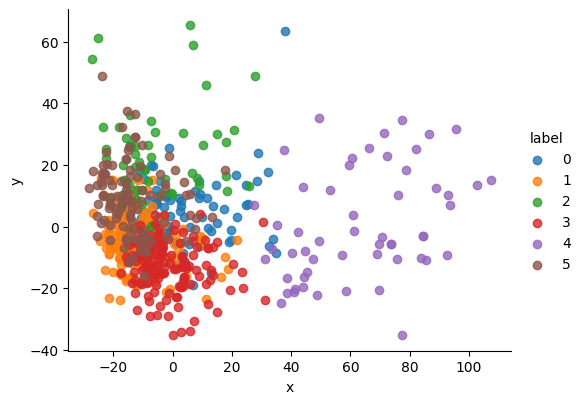

In [10]:
import seaborn as sns
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label',
                   fit_reg=False, legend=True, facet_kws={'legend_out': True})
cluster.fig.set_size_inches(6, 4)

In [11]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(data_features)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


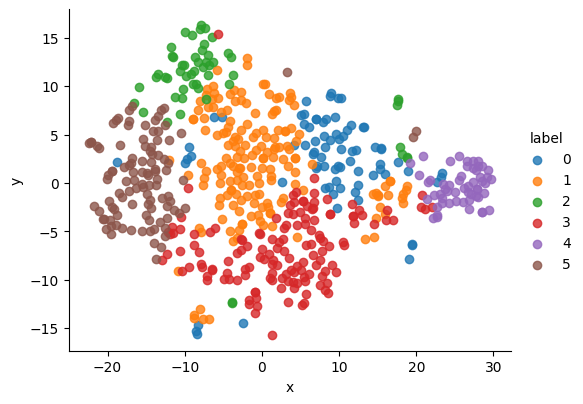

In [12]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', fit_reg=False, legend=True, facet_kws={'legend_out': True})
cluster.fig.set_size_inches(6, 4)

In [13]:
pca.explained_variance_ratio_

array([0.43798608, 0.17454666])

In [14]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=data_features.columns,index = ['PC-1','PC-2']))

        energy  danceability  liveness  acousticness  speechiness       pop
PC-1 -0.538315     -0.183234 -0.106366      0.814941    -0.015063  0.031170
PC-2  0.150331     -0.408807  0.324991      0.082877     0.066276 -0.832704


In [15]:
data['label'] = y_kmeans

# shuffle dataset
data = data.sample(frac=1) #frac=1 samples 100% of the data
data['label'].value_counts()

label
1    172
3    142
5    103
0     77
4     55
2     54
Name: count, dtype: int64

In [16]:
data[data['label'] == 0].tail(10) #returns the last N rows of filtered DataFrame

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
21,22,Whataya Want from Me,Adam Lambert,australian pop,2010,68,44,6,1,5,66,0
450,451,Mercy,Shawn Mendes,canadian pop,2017,66,56,11,13,8,81,0
65,66,Best Thing I Never Had,Beyoncé,dance pop,2011,65,55,9,14,3,73,0
233,234,human,Christina Perri,dance pop,2014,49,44,11,13,4,68,0
287,288,Love Me Harder,Ariana Grande,dance pop,2015,71,47,8,1,3,76,0
408,409,Rise,Katy Perry,dance pop,2016,64,55,11,5,5,66,0
409,410,Wherever I Go,OneRepublic,dance pop,2016,69,55,27,9,4,66,0
51,52,A Thousand Years,Christina Perri,dance pop,2011,41,42,11,31,3,81,0
536,537,Tequila,Dan + Shay,contemporary country,2018,59,47,13,3,3,76,0
315,316,Here,Alessia Cara,canadian contemporary r&b,2015,82,38,8,8,10,68,0


In [17]:
data['top genre'][data['label'] == 0].value_counts()

top genre
dance pop                    37
canadian pop                  5
pop                           5
canadian contemporary r&b     3
australian dance              3
british soul                  3
barbadian pop                 3
neo mellow                    2
permanent wave                2
electropop                    1
australian pop                1
brostep                       1
alaska indie                  1
hip pop                       1
folk-pop                      1
big room                      1
celtic rock                   1
baroque pop                   1
boy band                      1
downtempo                     1
art pop                       1
house                         1
contemporary country          1
Name: count, dtype: int64

In [18]:
data[data['label'] == 1].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
307,308,Heartbeat Song,Kelly Clarkson,dance pop,2015,80,49,6,1,5,69,1
586,587,Don't Call Me Up,Mabel,dance pop,2019,88,67,8,30,15,86,1
28,29,Teenage Dream,Katy Perry,dance pop,2010,80,72,13,2,4,63,1
491,492,Body Moves,DNCE,dance pop,2017,69,65,4,0,4,62,1
472,473,Reggaetón Lento (Remix),CNCO,boy band,2017,91,53,10,15,9,71,1
126,127,Where Have You Been,Rihanna,barbadian pop,2012,85,72,22,0,9,68,1
497,498,No Vacancy (with Sebastián Yatra),OneRepublic,dance pop,2017,76,69,14,8,4,57,1
193,194,What About Love,Austin Mahone,dance pop,2013,78,63,4,0,4,54,1
11,12,Marry You,Bruno Mars,pop,2010,83,62,10,33,4,73,1
569,570,...Ready For It? - BloodPop® Remix,Taylor Swift,pop,2018,84,58,10,13,22,52,1


In [19]:
data['top genre'][data['label'] == 0].value_counts()

top genre
dance pop                    37
canadian pop                  5
pop                           5
canadian contemporary r&b     3
australian dance              3
british soul                  3
barbadian pop                 3
neo mellow                    2
permanent wave                2
electropop                    1
australian pop                1
brostep                       1
alaska indie                  1
hip pop                       1
folk-pop                      1
big room                      1
celtic rock                   1
baroque pop                   1
boy band                      1
downtempo                     1
art pop                       1
house                         1
contemporary country          1
Name: count, dtype: int64

In [20]:
data[data['label'] == 2].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
426,427,Keeping Your Head Up,Birdy,neo mellow,2016,78,60,19,16,5,52,2
206,207,Give It 2 U,Robin Thicke,dance pop,2013,83,67,16,10,7,41,2
360,361,Let Me Be Your Lover,Enrique Iglesias,dance pop,2015,90,72,6,1,13,34,2
257,258,Anaconda,Nicki Minaj,dance pop,2014,60,96,21,7,18,50,2
263,264,Sheezus,Lily Allen,dance pop,2014,50,78,11,15,4,37,2
208,209,Outta Nowhere (feat. Danny Mercer),Pitbull,dance pop,2013,84,71,21,16,3,35,2
137,138,It Will Rain,Bruno Mars,pop,2012,84,58,8,34,5,38,2
264,265,Cannonball,Lea Michele,hollywood,2014,82,56,19,2,5,37,2
357,358,Legendary Lovers,Katy Perry,dance pop,2015,84,62,8,2,8,41,2
504,505,Water Under the Bridge,Adele,british soul,2017,84,60,11,2,7,49,2


In [21]:
data['top genre'][data['label'] == 2].value_counts()

top genre
dance pop         38
hip pop            2
pop                2
big room           1
permanent wave     1
barbadian pop      1
moroccan pop       1
latin              1
canadian latin     1
complextro         1
atl hip hop        1
colombian pop      1
neo mellow         1
hollywood          1
british soul       1
Name: count, dtype: int64

In [22]:
data[data['label'] == 3].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
537,538,Look What You Made Me Do,Taylor Swift,pop,2018,71,77,13,20,12,75,3
548,549,First Time,Kygo,edm,2018,59,63,10,20,11,71,3
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,66,61,20,1,3,75,3
515,516,In My Blood,Shawn Mendes,canadian pop,2018,71,62,13,6,7,83,3
582,583,Higher Love,Kygo,edm,2019,68,69,10,2,3,88,3
511,512,New Rules,Dua Lipa,dance pop,2018,70,76,15,0,7,84,3
492,493,Reality (feat. Janieck Devy) - Radio Edit,Lost Frequencies,belgian edm,2017,64,73,8,2,4,59,3
445,446,Starboy,The Weeknd,canadian contemporary r&b,2017,59,68,14,14,28,85,3
521,522,"Let Me Go (with Alesso, Florida Georgia Line &...",Hailee Steinfeld,dance pop,2018,71,66,8,3,5,82,3
447,448,That's What I Like,Bruno Mars,pop,2017,56,85,9,1,4,83,3


In [23]:
data['top genre'][data['label'] == 3].value_counts()

top genre
dance pop                    72
pop                          20
electropop                    6
canadian pop                  6
edm                           4
barbadian pop                 3
canadian contemporary r&b     3
hip hop                       3
boy band                      3
british soul                  2
canadian hip hop              2
big room                      2
art pop                       2
tropical house                1
complextro                    1
australian hip hop            1
australian pop                1
electro                       1
escape room                   1
danish pop                    1
metropopolis                  1
hip pop                       1
alternative r&b               1
downtempo                     1
latin                         1
electronic trap               1
belgian edm                   1
Name: count, dtype: int64

In [24]:
data[data['label'] == 4].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
560,561,This Town,Niall Horan,dance pop,2018,41,68,12,70,3,64,4
260,261,Tee Shirt - Soundtrack Version,Birdy,neo mellow,2014,34,68,9,84,3,49,4
422,423,Wish That You Were Here - From Miss Peregrine...,Florence + The Machine,art pop,2016,57,37,13,72,3,57,4
411,412,Don't Be A Fool,Shawn Mendes,canadian pop,2016,34,47,10,60,4,65,4
330,331,Mark My Words,Justin Bieber,canadian pop,2015,26,38,17,88,3,63,4
273,274,Take Me To Church,Hozier,irish singer-songwriter,2015,66,57,12,63,5,81,4
592,593,Girls Like You (feat. Cardi B),Maroon 5,pop,2019,54,85,13,57,5,81,4
309,310,Trumpets,Jason Derulo,dance pop,2015,70,63,10,56,24,69,4
559,560,Walk On Water (feat. Beyoncé),Eminem,detroit hip hop,2018,44,48,64,81,24,65,4
210,211,All of Me,John Legend,neo mellow,2014,26,42,13,92,3,86,4


In [25]:
data['top genre'][data['label'] == 4].value_counts()

top genre
dance pop                    15
pop                           9
canadian pop                  7
neo mellow                    5
art pop                       4
british soul                  3
barbadian pop                 2
irish singer-songwriter       1
boy band                      1
electropop                    1
australian dance              1
hip pop                       1
folk-pop                      1
acoustic pop                  1
canadian contemporary r&b     1
permanent wave                1
detroit hip hop               1
Name: count, dtype: int64

In [26]:
data[data['label'] == 5].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
24,25,All The Right Moves,OneRepublic,dance pop,2010,95,53,28,26,5,65,5
412,413,LIKE I WOULD,ZAYN,dance pop,2016,83,56,26,2,11,65,5
215,216,Shake It Off,Taylor Swift,pop,2014,80,65,33,6,17,78,5
134,135,Don't Stop the Party (feat. TJR),Pitbull,dance pop,2012,96,72,38,1,9,59,5
494,495,Touch (feat. Kid Ink),Little Mix,dance pop,2017,75,64,49,4,11,59,5
31,32,My First Kiss - feat. Ke$ha,3OH!3,dance pop,2010,89,68,36,1,8,62,5
433,434,Higher,Carly Rae Jepsen,canadian pop,2016,87,65,37,1,6,46,5
136,137,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,dance pop,2012,80,65,27,3,10,54,5
63,64,Monster,Kanye West,chicago rap,2011,69,63,67,0,20,73,5
62,63,Born This Way,Lady Gaga,dance pop,2011,83,59,33,0,16,73,5


In [27]:
data['top genre'][data['label'] == 5].value_counts()

top genre
dance pop           61
pop                  9
canadian pop         5
boy band             4
atl hip hop          3
electropop           3
australian pop       3
tropical house       2
barbadian pop        2
indie pop            2
escape room          1
edm                  1
detroit hip hop      1
french indie pop     1
british soul         1
big room             1
hip hop              1
candy pop            1
chicago rap          1
Name: count, dtype: int64

In [28]:
data[data['label']==0].mean(numeric_only=True)

id               310.610390
year            2014.714286
energy            64.623377
danceability      47.324675
liveness          13.259740
acousticness      12.597403
speechiness        8.922078
pop               66.038961
label              0.000000
dtype: float64

In [29]:
data[data['label']==1].mean(numeric_only=True)

id               282.133721
year            2014.313953
energy            82.494186
danceability      67.325581
liveness          11.087209
acousticness       7.895349
speechiness        7.732558
pop               69.476744
label              1.000000
dtype: float64

In [30]:
data[data['label']==2].mean(numeric_only=True)

id               307.203704
year            2014.277778
energy            74.518519
danceability      69.777778
liveness          17.074074
acousticness      12.425926
speechiness        9.203704
pop               36.611111
label              2.000000
dtype: float64

In [31]:
data[data['label']==3].mean(numeric_only=True)

id               351.169014
year            2015.436620
energy            61.380282
danceability      73.514085
liveness          14.232394
acousticness       7.838028
speechiness        7.809859
pop               73.654930
label              3.000000
dtype: float64

In [32]:
data[data['label']==4].mean(numeric_only=True)

id               336.509091
year            2015.181818
energy            40.654545
danceability      53.745455
liveness          13.727273
acousticness      69.090909
speechiness        6.200000
pop               69.327273
label              4.000000
dtype: float64

In [33]:
data[data['label']==5].mean(numeric_only=True)

id               239.796117
year            2013.650485
energy            81.291262
danceability      62.466019
liveness          39.728155
acousticness       7.058252
speechiness       10.446602
pop               66.291262
label              5.000000
dtype: float64

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'pop'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

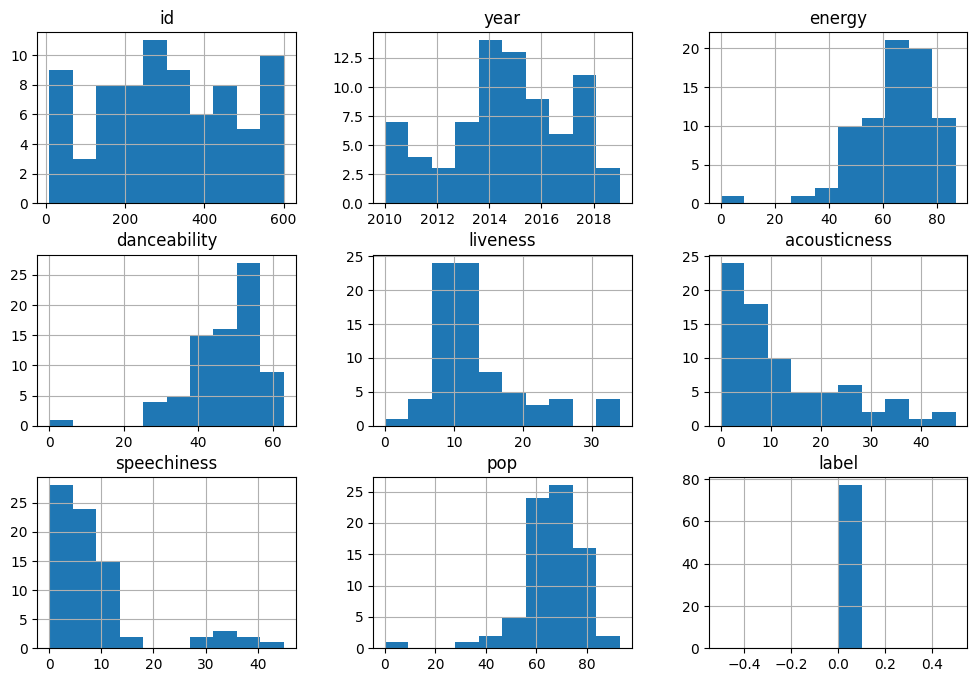

In [34]:
data[data['label']==0].hist(figsize=(12,8))

In [35]:
input1 = "love me" #input("Enter song1: ")
input2 = "baby" #input("Enter song2: ")
input3 = "like it" #input("Enter song3: ")

In [36]:
# Function to find the cluster of a song
def get_song_cluster(song_title, dataframe, kmeans_model, feature_data):
    song_row = dataframe[dataframe['title'].str.contains(song_title, case=False, na=False)]
    if not song_row.empty:
        # Use the index of the original dataframe to select the corresponding feature row
        song_features = feature_data.loc[song_row.index]
        cluster = kmeans_model.predict(song_features)
        return cluster[0]
    return None

# Get clusters for input songs
input_songs = [input1, input2, input3]
input_clusters = []
for song_title in input_songs:
    cluster = get_song_cluster(song_title, data, kmeans, data_features)
    if cluster is not None:
        input_clusters.append(cluster)
        print(f"'{song_title}' is in cluster {cluster}")
    else:
        print(f"'{song_title}' not found in the dataset.")

# Recommend songs from the identified clusters
recommended_songs = pd.DataFrame()
if input_clusters:
    # Get unique clusters from input songs
    unique_clusters = list(set(input_clusters))
    print(f"\nRecommending songs from cluster(s): {unique_clusters}")
    for cluster_label in unique_clusters:
        cluster_songs = data[data['label'] == cluster_label]
        # Exclude the input songs from the recommendations
        recommended_songs = pd.concat([recommended_songs, cluster_songs[~cluster_songs['title'].str.contains('|'.join(input_songs), case=False, na=False)]])

# Display recommended songs
if not recommended_songs.empty:
    print("\nRecommended Songs:")
    # Display a random sample of recommended songs with selected columns
    display(recommended_songs.sample(min(10, len(recommended_songs)))[['title', 'artist', 'top genre', 'year']])
else:
    print("\nNo recommendations found for the given songs.")

'love me' is in cluster 3
'baby' is in cluster 1
'like it' is in cluster 5

Recommending songs from cluster(s): [1, 3, 5]

Recommended Songs:


,title,artist,top genre,year
90,Papi,Jennifer Lopez,dance pop,2011
445,Starboy,The Weeknd,canadian contemporary r&b,2017
89,I'm Into You,Jennifer Lopez,dance pop,2011
130,Turn Up the Music,Chris Brown,dance pop,2012
66,Party Rock Anthem,LMFAO,dance pop,2011
165,Can't Hold Us (feat. Ray Dalton),Macklemore & Ryan Lewis,dance pop,2013
338,Prayer in C - Robin Schulz Radio Edit,Lilly Wood and The Prick,french indie pop,2015
200,How Ya Doin'? (feat. Missy Elliott),Little Mix,dance pop,2013
477,Bodak Yellow,Cardi B,pop,2017
153,Die Young,Kesha,dance pop,2013
